<a href="https://colab.research.google.com/github/mongabra/AI-week_3/blob/main/AIwk_3_ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# ================================
# CELL 1: Setup and dependencies
# ================================

# Try loading spaCy and download model if missing
try:
    import spacy
    nlp = spacy.load("en_core_web_sm")
except Exception:
    !python -m pip install -U spacy
    !python -m spacy download en_core_web_sm
    import spacy
    nlp = spacy.load("en_core_web_sm")

# Install textblob (for sentiment)
!python -m pip install -U textblob

# Imports
import os
import bz2
import pandas as pd
from textblob import TextBlob

print("✅ Setup complete! Ready to move on.")


✅ Setup complete! Ready to move on.


In [12]:
# ================================
# CELL 2: Upload and Extract Dataset
# ================================

from google.colab import files

# Step 1: Upload the dataset file (e.g., test.ft.txt.bz2)
print("📂 Please upload your dataset file (e.g., test.ft.txt.bz2)")
uploaded = files.upload()

# Step 2: Read and extract the first few lines
data = []
if uploaded:
    file_name = list(uploaded.keys())[0]
    print(f"✅ File uploaded successfully: {file_name}")

    # Step 3: Decompress and read
    with bz2.open(file_name, "rt", encoding="utf-8") as f:
        for i, line in enumerate(f):
            data.append(line.strip())
            if i > 200:  # Read only 200 lines to make it lightweight
                break

    print(f"✅ Successfully read {len(data)} sample lines from the dataset.")
else:
    print("⚠️ No file uploaded. Please try again.")


📂 Please upload your dataset file (e.g., test.ft.txt.bz2)


Saving test.ft.txt.bz2 to test.ft.txt (1).bz2
✅ File uploaded successfully: test.ft.txt (1).bz2
✅ Successfully read 202 sample lines from the dataset.


In [13]:
# ================================
# CELL 3: Clean and Preprocess Text Data
# ================================

import re
import pandas as pd

# Step 1: Convert the loaded text into a DataFrame
df = pd.DataFrame(data, columns=["Raw_Text"])

# Step 2: Clean the text (remove labels, special chars, etc.)
def clean_text(text):
    text = re.sub(r"__label__\d+", "", text)  # remove labels like __label__1
    text = re.sub(r"[^a-zA-Z0-9\s.,!?']", " ", text)  # remove special chars
    text = re.sub(r"\s+", " ", text)  # remove extra spaces
    return text.strip()

df["Clean_Review"] = df["Raw_Text"].apply(clean_text)

# Step 3: Display a few cleaned samples
print("✅ Cleaned text sample preview:")
df.head(5)


✅ Cleaned text sample preview:


,Raw_Text,Clean_Review
0,__label__2 Great CD: My lovely Pat has one of ...,Great CD My lovely Pat has one of the GREAT vo...
1,__label__2 One of the best game music soundtra...,One of the best game music soundtracks for a g...
2,__label__1 Batteries died within a year ...: I...,Batteries died within a year ... I bought this...
3,"__label__2 works fine, but Maha Energy is bett...","works fine, but Maha Energy is better Check ou..."
4,__label__2 Great for the non-audiophile: Revie...,Great for the non audiophile Reviewed quite a ...


In [14]:
# ================================
# CELL 4: Named Entity Recognition (NER) with spaCy
# ================================

import spacy

# Load the small English NLP model
nlp = spacy.load("en_core_web_sm")

# Function to extract named entities (like products or brands)
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Apply NER to a small sample (for faster processing)
df["Entities"] = df["Clean_Review"].head(20).apply(extract_entities)

# Display results
print("✅ Named Entities Extracted (Sample):")
df[["Clean_Review", "Entities"]].head(10)


✅ Named Entities Extracted (Sample):


,Clean_Review,Entities
0,Great CD My lovely Pat has one of the GREAT vo...,"[(Pat, PERSON), (one, CARDINAL), (GREAT, ORG),..."
1,One of the best game music soundtracks for a g...,"[(One, CARDINAL), (Chrono Trigger, PERSON), (o..."
2,Batteries died within a year ... I bought this...,"[(a year, DATE), (2003, DATE), (about a year, ..."
3,"works fine, but Maha Energy is better Check ou...","[(Maha Energy, PERSON), (Their Powerex MH C204..."
4,Great for the non audiophile Reviewed quite a ...,"[(VHS, ORG)]"
5,DVD Player crapped out after one year I also b...,"[(one year, DATE), (hte, ORG), (one year, DATE..."
6,"Incorrect Disc I love the style of this, but a...","[(Incorrect Disc, PERSON), (a couple years, DA..."
7,DVD menu select problems I cannot scroll throu...,[]
8,Unique Weird Orientalia from the 1930's Exotic...,"[(Unique, GPE), (1930, DATE), (Exotic, ORG), (..."
9,"Not an ultimate guide Firstly,I enjoyed the fo...","[(Firstly, ORDINAL)]"


In [19]:
from textblob import TextBlob

# Improved sentiment classification function
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity >= 0.2:
        return "Positive"
    elif polarity <= -0.2:
        return "Negative"
    else:
        return "Neutral"

# Apply to dataset
df['Sentiment'] = df['Clean_Review'].apply(get_sentiment)

# Show sample output
print(df[['Clean_Review', 'Sentiment']].head(10))


                                        Clean_Review Sentiment
0  Great CD My lovely Pat has one of the GREAT vo...   Neutral
1  One of the best game music soundtracks for a g...   Neutral
2  Batteries died within a year ... I bought this...  Positive
3  works fine, but Maha Energy is better Check ou...  Positive
4  Great for the non audiophile Reviewed quite a ...  Positive
5  DVD Player crapped out after one year I also b...  Negative
6  Incorrect Disc I love the style of this, but a...   Neutral
7  DVD menu select problems I cannot scroll throu...   Neutral
8  Unique Weird Orientalia from the 1930's Exotic...   Neutral
9  Not an ultimate guide Firstly,I enjoyed the fo...  Positive


📊 Sentiment Summary:
Sentiment
Neutral     111
Positive     73
Negative     18
Name: count, dtype: int64


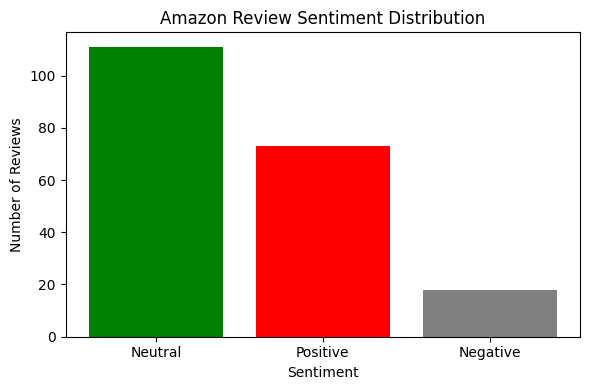

In [20]:
# Summary of sentiment results
sentiment_counts = df['Sentiment'].value_counts()
print("📊 Sentiment Summary:")
print(sentiment_counts)

# Bar chart visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'gray'])
plt.title("Amazon Review Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()
